In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as si


# Problem 1

**Following is the Value given by Black Scholes**

In [4]:
#Problem 1-----------------------------------------------------
S0 = 10
sigma = 0.2
r = 0.04
dt = 0.002
dX = sigma*np.array([np.sqrt(dt),np.sqrt(3*dt),np.sqrt(4*dt)])
K = 10
T = 0.5
steps = int(T/dt)
S = np.arange(4,17,1)

###############B-S######################
def f_BS(S0,type):
    K=10.0
    T=0.5
    sigma=0.2
    r=0.04
    d_1=(np.log(S0/K)+(r+0.5*sigma**2)*T)/(sigma * np.sqrt(T))
    d_2=d_1-sigma*np.sqrt(T)
    if type=="call":
        option=(S0*si.norm.cdf(d_1,0.0,1.0)-K*np.exp(-r*T)*si.norm.cdf(d_2,0.0,1.0))
    if type=="put":
        option=(K*np.exp(-r*T)*si.norm.cdf(-d_2, 0.0, 1.0)-S0*si.norm.cdf(-d_1,0.0,1.0))
    return option

BS_EFD = np.zeros(13)
for i in range(13):
    BS_EFD[i] = f_BS(S[i],"put")

In [8]:
print("Balck Scholes: ",BS_EFD,)

Balck Scholes:  [5.80198673e+00 4.80198692e+00 3.80205782e+00 2.80535743e+00
 1.84426859e+00 1.02442812e+00 4.64694534e-01 1.71536863e-01
 5.24596231e-02 1.36511383e-02 3.10746681e-03 6.34561801e-04
 1.18785901e-04]


In [9]:
###############EFD######################
def f_EFD(S0,dX,sigma,dt,r,K,steps):
    Pu = dt*(sigma**2/(2*dX**2)+(r-sigma**2/2)/(2*dX))
    Pm = 1-dt*sigma**2/(dX**2) - r*dt
    Pd = dt*(sigma**2/(2*dX**2)-(r-sigma**2/2)/(2*dX))
    
    TerP = np.arange(np.log(100)+dX,np.log(1)-dX,-dX)
    index = np.where(np.exp(TerP)<S0)[0][0]
    N = len(TerP)
    A = np.zeros(shape = (N,N))
    move = np.array([0,1,2])
    A[0,move] = [Pu,Pm,Pd]
    A[1,move] = [Pu,Pm,Pd]
    for i in range(1,(N-3)):
        A[i+1,move+i] = [Pu,Pm,Pd]
    A[N-2,move+N-3] = [Pu,Pm,Pd]
    A[N-1,move+N-3] = [Pu,Pm,Pd]
    
    F = np.maximum(K - np.exp(TerP),0)
    
    B = np.zeros(N)
    B[-1] = np.exp(TerP[-2])-np.exp(TerP[-1])
    
    for i in range(steps):
        F = np.dot(A,F)+B
    option = np.mean([F[index-1],F[index]])
    return option

optionE = np.zeros((3,13))
for i in range(3):
    for j in range(13):
        optionE[i,j] = f_EFD(S[j],dX[i],sigma,dt,r,K,steps)

Err_EFD = BS_EFD - optionE

**Following is the option prices calculated by EXPLICIT METHOD with column represents different S0 values and row represents different dX values:**

In [12]:
print(optionE)

[[5.78827438e+00 4.78252372e+00 3.79936205e+00 2.81673938e+00
  1.85171073e+00 1.04077220e+00 4.67558599e-01 1.66762471e-01
  5.58697956e-02 1.45709312e-02 2.90395697e-03 6.80252673e-04
  1.04023936e-04]
 [5.78462035e+00 4.81160099e+00 3.79211478e+00 2.78859638e+00
  1.89704928e+00 1.03172067e+00 4.57218418e-01 1.72958472e-01
  4.85085971e-02 1.30618534e-02 2.75245387e-03 6.58877253e-04
  1.33288592e-04]
 [5.77016098e+00 4.80476841e+00 3.82596355e+00 2.78566460e+00
  1.88464056e+00 1.01294878e+00 4.49636834e-01 1.76474418e-01
  5.25783055e-02 1.60492028e-02 2.72412706e-03 8.00402203e-04
  1.28975428e-04]]
[[ 1.37123580e-02  1.94632023e-02  2.69577780e-03 -1.13819449e-02
  -7.44214180e-03 -1.63440741e-02 -2.86406454e-03  4.77439259e-03
  -3.41017247e-03 -9.19792970e-04  2.03509834e-04 -4.56908719e-05
   1.47619650e-05]
 [ 1.73663872e-02 -9.61406677e-03  9.94304568e-03  1.67610516e-02
  -5.27806852e-02 -7.29254735e-03  7.47611606e-03 -1.42160894e-03
   3.95102604e-03  5.89284820e-04  3.5

**Following is the option prices ERRORS with EXPLICIT METHOD compared with Black Scholes with column represents different S0 values and row represents different dX values:**

In [13]:
print(Err_EFD)

[[ 1.37123580e-02  1.94632023e-02  2.69577780e-03 -1.13819449e-02
  -7.44214180e-03 -1.63440741e-02 -2.86406454e-03  4.77439259e-03
  -3.41017247e-03 -9.19792970e-04  2.03509834e-04 -4.56908719e-05
   1.47619650e-05]
 [ 1.73663872e-02 -9.61406677e-03  9.94304568e-03  1.67610516e-02
  -5.27806852e-02 -7.29254735e-03  7.47611606e-03 -1.42160894e-03
   3.95102604e-03  5.89284820e-04  3.55012943e-04 -2.43154515e-05
  -1.45026905e-05]
 [ 3.18257570e-02 -2.78148964e-03 -2.39057252e-02  1.96928364e-02
  -4.03719637e-02  1.14793477e-02  1.50577001e-02 -4.93755484e-03
  -1.18682373e-04 -2.39806455e-03  3.83339752e-04 -1.65840402e-04
  -1.01895264e-05]]


In [14]:
###############IFD######################
def f_IFD(S0,dX,sigma,dt,r,K,steps):
    Pu = -0.5*dt*(sigma**2/(dX**2)+(r-sigma**2/2)/(dX))
    Pm = 1+dt*sigma**2/(dX**2) + r*dt
    Pd = -0.5*dt*(sigma**2/(dX**2)-(r-sigma**2/2)/(dX))
    
    TerP = np.arange(np.log(20)+dX,np.log(1)-dX,-dX)
    index = np.where(np.exp(TerP)<S0)[0][0]
    N = len(TerP)
    A = np.zeros(shape = (N,N))
    move = np.array([0,1,2])
    A[0,[0,1]] = [1,-1]
    A[1,move] = [Pu,Pm,Pd]
    for i in range(N-3):
        A[i+1,move+i] = [Pu,Pm,Pd]
    A[-2,[-3,-2,-1]] = [Pu,Pm,Pd]
    A[-1,[-2,-1]] = [1,-1]
    
    F = np.maximum(K - np.exp(TerP),0)
    
    B = np.zeros(N)
    B[1:-1]= F[1:-1]
    B[-1] = np.exp(TerP[-2])-np.exp(TerP[-1])
    
    for i in range(steps):
        F = np.dot(np.linalg.inv(A),B)
        B = np.zeros(N)
        B[1:-1]= F[1:-1]
        B[-1] = np.exp(TerP[-2])-np.exp(TerP[-1])
    option = np.mean([F[index-1],F[index]])
    return option

optionI = np.zeros((3,13))
for i in range(3):
    for j in range(13):
        optionI[i,j] = f_IFD(S[j],dX[i],sigma,dt,r,K,steps)

Err_IFD = BS_EFD - optionI

**Following is the option prices calculated by IMPLICIT METHOD with column represents different S0 values and row represents different dX values:**

In [18]:
print(optionI)

[[5.78615809e+00 4.77987335e+00 3.79620443e+00 2.81324436e+00
  1.84818180e+00 1.03731054e+00 4.64793689e-01 1.65396135e-01
  5.54744034e-02 1.45954925e-02 2.97585487e-03 7.21040535e-04
  1.17320123e-04]
 [5.77770751e+00 4.80301019e+00 3.78178412e+00 2.77681125e+00
  1.88475334e+00 1.02060432e+00 4.49471776e-01 1.69001398e-01
  4.72665970e-02 1.27939425e-02 3.80624496e-03 6.76593934e-04
  1.43367723e-04]
 [5.76803507e+00 4.80212986e+00 3.82281916e+00 2.78216134e+00
  1.88109112e+00 1.00944414e+00 4.46860453e-01 1.74992002e-01
  5.21952606e-02 1.60484797e-02 2.79061044e-03 8.42000965e-04
  1.43323902e-04]]


**Following is the option prices ERRORS with IMPLICIT METHOD compared with Black Scholes with column represents different S0 values and row represents different dX values:**

In [17]:
print(Err_IFD)

[[ 1.58286438e-02  2.21135696e-02  5.85339343e-03 -7.88692764e-03
  -3.91320875e-03 -1.28824154e-02 -9.91545740e-05  6.14072864e-03
  -3.01478027e-03 -9.44354280e-04  1.31611936e-04 -8.64787335e-05
   1.46577856e-06]
 [ 2.42792216e-02 -1.02326877e-03  2.02737010e-02  2.85461830e-02
  -4.04847472e-02  3.82379965e-03  1.52227583e-02  2.53546515e-03
   5.19302609e-03  8.57195783e-04 -6.98778148e-04 -4.20321323e-05
  -2.45818214e-05]
 [ 3.39516641e-02 -1.42944369e-04 -2.07613364e-02  2.31960938e-02
  -3.68225278e-02  1.49839850e-02  1.78340819e-02 -3.45513839e-03
   2.64362551e-04 -2.39734147e-03  3.16856365e-04 -2.07439163e-04
  -2.45380008e-05]]


In [19]:
###############CNFD######################
def f_CNFD(S0,dX,sigma,dt,r,K,steps):
    Pu = -1/4*dt*(sigma**2/(dX**2)+(r-sigma**2/2)/(dX))
    Pm = 1+dt*sigma**2/(2*dX**2) + r*dt/2
    Pd = -1/4*dt*(sigma**2/(dX**2)-(r-sigma**2/2)/(dX))
    
    TerP = np.arange(np.log(20)+dX,np.log(1)-dX,-dX)    
    F = np.maximum(K - np.exp(TerP),0)
    
    index = np.where(np.exp(TerP)<S0)[0][0]
    N = len(TerP)
    move = np.array([0,1,2])
    X = np.zeros(shape = (N,N))
    X[0,[0,1]] = 0
    X[1,move] = [-Pu,-(Pm-2),-Pd]
    for i in range(1,(N-3)):
        X[i+1,move+i] = [-Pu,-(Pm-2),-Pd]
    X[-2,move+N-3] = [-Pu,-(Pm-2),-Pd]
    
    Y = np.zeros(N)
    Y[-1] = np.exp(TerP[-2])-np.exp(TerP[-1])
    
    A = np.zeros(shape = (N,N))
    A[0,[0,1]] = [1,-1]
    A[1,move] = [Pu,Pm,Pd]
    for i in range(1,(N-3)):
        A[i+1,move+i] = [Pu,Pm,Pd]
    A[-2,move+N-3] = [Pu,Pm,Pd]
    A[-1,[-2,-1]] = [1,-1]
    
    B = np.dot(np.linalg.inv(A),X)
    D = np.dot(np.linalg.inv(A),Y)
    
    for i in range(steps):
        F = np.dot(B,F)+D
    
    option = np.mean([F[index],F[index-1]])
    return option

optionCN = np.zeros((3,13))
for i in range(3):
    for j in range(13):
        optionCN[i,j] = f_CNFD(S[j],dX[i],sigma,dt,r,K,steps)

Err_CNFD = BS_EFD - optionCN

**Following is the option prices calculated by CRANK-NICOLSON METHOD with column represents different S0 values and row represents different dX values:**

In [20]:
print(optionCN)

[[5.78615025e+00 4.77986543e+00 3.79618944e+00 2.81315496e+00
  1.84800517e+00 1.03735518e+00 4.65072477e-01 1.65546083e-01
  5.54490323e-02 1.45137172e-02 2.92332848e-03 6.96397803e-04
  1.09897568e-04]
 [5.77769967e+00 4.80300227e+00 3.78176861e+00 2.77671722e+00
  1.88457606e+00 1.02065681e+00 4.49751356e-01 1.69154845e-01
  4.72259555e-02 1.27133178e-02 3.74858670e-03 6.53347323e-04
  1.35037185e-04]
 [5.76802723e+00 4.80212194e+00 3.82280456e+00 2.78206810e+00
  1.88091432e+00 1.00950193e+00 4.47139902e-01 1.75151977e-01
  5.21634270e-02 1.59674806e-02 2.74066139e-03 8.15729714e-04
  1.35100459e-04]]


**Following is the option prices ERRORS with CRANK-NICOLSON METHOD compared with Black Scholes with column represents different S0 values and row represents different dX values:**

In [22]:
print(Err_CNFD)

[[ 1.58364851e-02  2.21214876e-02  5.86838001e-03 -7.79753206e-03
  -3.73657477e-03 -1.29270547e-02 -3.77942894e-04  5.99078022e-03
  -2.98940920e-03 -8.62578907e-04  1.84138327e-04 -6.18360017e-05
   8.88833323e-06]
 [ 2.42870629e-02 -1.01535244e-03  2.02892182e-02  2.86402128e-02
  -4.03074669e-02  3.77131384e-03  1.49431781e-02  2.38201803e-03
   5.23366758e-03  9.37820477e-04 -6.41119890e-04 -1.87855218e-05
  -1.62512836e-05]
 [ 3.39595054e-02 -1.35023367e-04 -2.07467338e-02  2.32893290e-02
  -3.66457267e-02  1.49261921e-02  1.75546327e-02 -3.61511374e-03
   2.96196123e-04 -2.31634239e-03  3.66805423e-04 -1.81167913e-04
  -1.63145582e-05]]


# Problem 2

In [23]:
#Problem 2-----------------------------------------------------
S0 = 10
sigma = 0.2
r = 0.04
dt = 0.002
dS = 0.25
K = 10
T = 0.5
steps = int(T/dt)

**Following is the function that calculates the option prices by using GENERALIZED FINITE-DIFFERENCE method**

In [24]:
###############Generalized Finite-Difference######################
def f_A_PDE(a,dS,r,sigma,dt,S0,K,steps,name):
    TerP = np.arange(0,20+dS,dS)
    index = np.abs(TerP-S0).argmin()
    n = len(TerP)
    
    j = np.arange(1,n-1,1)
    alpha = a
    a1 = 0.5*((sigma**2)*(j**2)-r*j)*(1-alpha)
    a2 = -1/dt-((sigma**2)*(j**2)+r)*(1-alpha)
    a3 = 0.5*((sigma**2)*(j**2)+r*j)*(1-alpha)
    b1 = 0.5*((sigma**2)*(j**2)-r*j)*alpha
    b2 = 1/dt-((sigma**2)*(j**2)+r)*alpha
    b3 = 0.5*((sigma**2)*(j**2)+r*j)*alpha
    
    P = np.maximum(np.round(K - TerP,4),0)
    C = np.maximum(np.round(TerP - K,4),0)
    
    A = np.zeros(shape = (n,n))
    move = np.array([0,1,2])
    A[0,[0,1]] = [1,-1]
    for i in range(n-2):
        A[i+1,move+i] = [a1[i],a2[i],a3[i]]
    A[-1,[-2,-1]] = [1,-1]
    
    B = np.zeros(shape = (n,n))
    for i in range(n-2):
        B[i+1,move+i] = [-b1[i],-b2[i],-b3[i]]
    
    eC = np.zeros(n)
    eC[0] = TerP[0]-TerP[1]
    eP = np.zeros(n)
    eP[0] = TerP[-2]-TerP[-1]
    
    for i in range(steps):
        C = np.dot(np.linalg.inv(A),np.dot(B,C)+eC)
        C = np.maximum(C,np.maximum(np.round(TerP - K,4),0))
        P = np.dot(np.linalg.inv(A),np.dot(B,P)+eP)
        P = np.maximum(P,np.maximum(np.round(K - TerP,4),0))
        
    if name == "C":
        return C[index]
    else:
        return P[index]

**The following generates the options prices for American Put/Call Option**

In [25]:
optionC = np.zeros((9,13))
optionP = np.zeros((9,13))
S = np.arange(4,17,1)
dS = [0.25,1,1.25]
a = [1,0,0.5]

pS = [0,0,0,1,1,1,2,2,2]
pa = [0,1,2,0,1,2,0,1,2]
for i in range(9):
    for j in range(len(S)):
        optionC[i,j] = f_A_PDE(a[pa[i]],dS[pS[i]],r,sigma,dt,S[j],K,steps,"C")
for i in range(9):
    for j in range(len(S)):
        optionP[i,j] = f_A_PDE(a[pa[i]],dS[pS[i]],r,sigma,dt,S[j],K,steps,"P")

In [26]:
print(optionC)

[[3.23696901e-10 4.73061853e-07 8.95673120e-05 3.48932677e-03
  4.20739932e-02 2.21037817e-01 6.60797846e-01 1.36832742e+00
  2.25001819e+00 3.21149181e+00 4.20060288e+00 5.19630645e+00
  6.18995908e+00]
 [7.15081363e-10 6.94829322e-07 1.04309683e-04 3.65166541e-03
  4.24139964e-02 2.20923454e-01 6.60217199e-01 1.36799609e+00
  2.25004803e+00 3.21150804e+00 4.20007668e+00 5.19418020e+00
  6.18404856e+00]
 [4.91185022e-10 5.77781039e-07 9.68547354e-05 3.57066850e-03
  4.22441497e-02 2.20980311e-01 6.60507750e-01 1.36816144e+00
  2.25003115e+00 3.21148329e+00 4.20024434e+00 5.19487489e+00
  6.18595847e+00]
 [7.92163922e-07 2.64510236e-05 5.06920716e-04 5.88940615e-03
  4.29164858e-02 2.01044471e-01 6.23047544e-01 1.34812264e+00
  2.24495750e+00 3.21142689e+00 4.20098941e+00 5.19616136e+00
  6.18932658e+00]
 [8.98402156e-07 2.87121514e-05 5.31679021e-04 6.02573911e-03
  4.32324386e-02 2.01054174e-01 6.22287807e-01 1.34785662e+00
  2.24494162e+00 3.21103546e+00 4.19910596e+00 5.19019725e+0

|dS = 0.25|S0=4|S0=5|S0=6|S0=7|S0=8|S0=9|S0=10|S0=11|S0=12|S0=13|S0=14|S0=15|S0=16|
|---------|----|----|----|----|----|----|-----|-----|-----|-----|-----|-----|-----|
|Implicit|3.23697e-10|4.73062e-07|8.95673e-05|0.00348933|0.042074|0.221038|0.660798|1.36833|2.25002|3.21149|4.2006|5.19631|6.18996|
|Explitcit|7.15081e-10|6.94829e-07|0.00010431|0.00365167|0.042414|0.220923|0.660217|1.368|2.25005|3.21151|4.20008|5.19418|6.18405|
|Crank-Nicolson|4.91185e-10|5.77781e-07|9.68547e-05|0.00357067|0.0422441|0.22098|0.660508|1.36816|2.25003|3.21148|4.20024|5.19487|6.18596|



|dS = 1|S0=4|S0=5|S0=6|S0=7|S0=8|S0=9|S0=10|S0=11|S0=12|S0=13|S0=14|S0=15|S0=16|
|---------|----|----|----|----|----|----|-----|-----|-----|-----|-----|-----|-----|
|Implicit|7.92164e-07|2.6451e-05|0.000506921|0.00588941|0.0429165|0.201044|0.623048|1.34812|2.24496|3.21143|4.20099|5.19616|6.18933|
|Explitcit|8.98402e-07|2.87122e-05|0.000531679|0.00602574|0.0432324|0.201054|0.622288|1.34786|2.24494|3.21104|4.19911|5.1902|6.17409|
|Crank-Nicolson|8.44309e-07|2.7571e-05|0.000519263|0.00595763|0.0430747|0.201049|0.622668|1.34799|2.24493|3.21111|4.19953|5.1914|6.17674|


|dS = 1.25|S0=4|S0=5|S0=6|S0=7|S0=8|S0=9|S0=10|S0=11|S0=12|S0=13|S0=14|S0=15|S0=16|
|---------|----|----|----|----|----|----|-----|-----|-----|-----|-----|-----|-----|
|Implicit|1.1817e-06|5.71238e-05|0.0013862|0.0183159|0.0183159|	0.137262|	0.596307	|1.55398	|2.72281	|2.72281	|3.95285	|5.19605	|6.43618|
|Explitcit|1.3019e-06	|6.06168e-05	|0.00142978|	0.0185329|	0.0185329|	0.137464|	0.595523|	1.55386|	2.72255|	2.72255	|3.95089|	5.18809	|6.41199|
|Crank-Nicolson|1.24099e-06	|5.88597e-05|	0.00140797|	0.0184245|	0.0184245|	0.137363|	0.595914|	1.5539|	2.72257|	2.72257|	3.95121	|5.18924	|6.4148|

In [27]:
print(optionP)

[[6.00000000e+00 5.00000000e+00 4.00000000e+00 3.00000000e+00
  2.00000000e+00 1.08128231e+00 4.80663846e-01 1.75062833e-01
  5.31157712e-02 1.37847278e-02 3.14472884e-03 6.46276053e-04
  1.22144542e-04]
 [6.00000000e+00 5.00000000e+00 4.00000000e+00 3.00000000e+00
  2.00000000e+00 1.08057257e+00 4.79729532e-01 1.74591758e-01
  5.31327553e-02 1.39374913e-02 3.25050207e-03 6.92775642e-04
  1.38052364e-04]
 [6.00000000e+00 5.00000000e+00 4.00000000e+00 3.00000000e+00
  2.00000000e+00 1.08092228e+00 4.80191555e-01 1.74823182e-01
  5.31222962e-02 1.38607313e-02 3.19766197e-03 6.69528843e-04
  1.30056887e-04]
 [6.00000000e+00 5.00000000e+00 4.00000000e+00 3.00000000e+00
  2.00000000e+00 1.05162709e+00 4.39978944e-01 1.54452305e-01
  4.81521757e-02 1.38759316e-02 3.79614482e-03 1.00389879e-03
  2.59842593e-04]
 [6.00000000e+00 5.00000000e+00 4.00000000e+00 3.00000000e+00
  2.00000000e+00 1.05125183e+00 4.39081179e-01 1.54173471e-01
  4.82546415e-02 1.40218530e-02 3.88624541e-03 1.04610273e-0

|dS = 0.25|S0=4|S0=5|S0=6|S0=7|S0=8|S0=9|S0=10|S0=11|S0=12|S0=13|S0=14|S0=15|S0=16|
|---------|----|----|----|----|----|----|-----|-----|-----|-----|-----|-----|-----|
|Implicit|6|	5	|4|3	|2	|1.08128	|0.480664	|0.175063	|0.0531158	|0.0137847|	0.00314473	|0.000646276|	0.000122145|
|Explitcit|6	|5|	4	|3|	2|	1.08057	|0.47973|	0.174592|	0.0531328|	0.0139375|	0.0032505	|0.000692776|	0.000138052|
|Crank-Nicolson|6|	5	|4	|3|	2	|1.08092	|0.480192|	0.174823	|0.0531223||	0.0138607|	0.00319766|	0.000669529	|0.000130057|



|dS = 1|S0=4|S0=5|S0=6|S0=7|S0=8|S0=9|S0=10|S0=11|S0=12|S0=13|S0=14|S0=15|S0=16|
|---------|----|----|----|----|----|----|-----|-----|-----|-----|-----|-----|-----|
|Implicit|6|	5	|4	|3|	2|	1.05163|	0.439979|	0.154452	|0.0481522	|0.0138759	|0.00379614	|0.0010039|	0.000259843|
|Explitcit|6	|5|	4	|3	|2|	1.05125	|0.439081|	0.154173	|0.0482546	|0.0140219|	0.00388625|	0.0010461|	0.00027691|
|Crank-Nicolson|6	|5	|4	|3	||2|	1.05144|	0.43953	|0.154312	|0.0482034	|0.0139491|	0.00384131	|0.00102501	|0.000268355|


|dS = 1.25|S0=4|S0=5|S0=6|S0=7|S0=8|S0=9|S0=10|S0=11|S0=12|S0=13|S0=14|S0=15|S0=16|
|---------|----|----|----|----|----|----|-----|-----|-----|-----|-----|-----|-----|
|Implicit|6.25|	5|	3.75|	2.5|	2.5	|1.25337	|0.415328	|0.109704|	0.0256281|	0.0256281	|0.00559366|	0.00117666|	0.000243109|
|Explitcit|6.25	|5	|3.75|	2.5	|2.5	|1.25331|	0.414427	|0.109625|	0.0257729	|0.0257729|	0.00569068|	0.00121736	|0.000257124|
|Crank-Nicolson|6.25	|5|	3.75	|2.5	|2.5	|1.25334	|0.414877|	0.109664|	0.0257007	|0.0257007	|0.00564228	|0.00119702|	0.000250098|

**The followings are plots**

Text(0, 0.5, 'Option Prices')

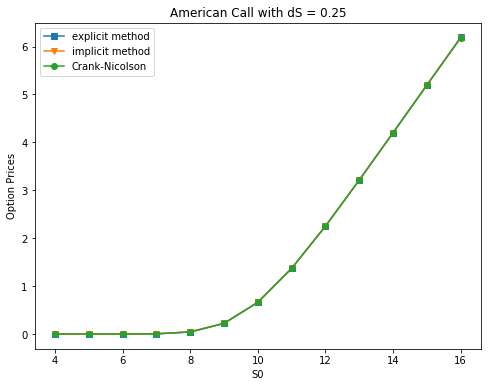

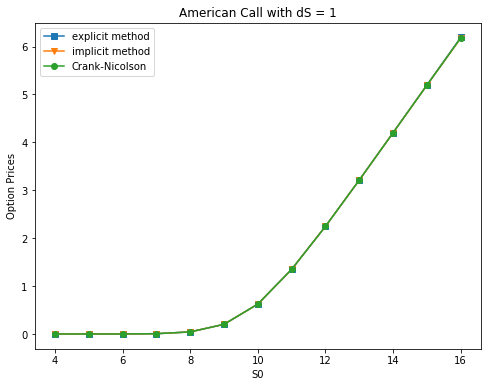

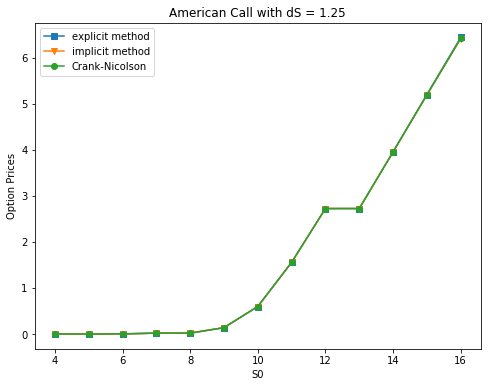

In [28]:
name = ["explicit method","implicit method","Crank-Nicolson"]
Shape = ["s","v","o"]
plt.figure(1,figsize = (8,6))
for i in range(3):
    plt.plot(np.arange(4,17,1),optionC[i,:],marker = Shape[i],label = name[i])
plt.legend()
plt.title("American Call with dS = 0.25")
plt.xlabel("S0")
plt.ylabel("Option Prices")

plt.figure(2,figsize = (8,6))
for i in range(3):
    plt.plot(np.arange(4,17,1),optionC[i+3,:],marker = Shape[i],label = name[i])
plt.legend()
plt.title("American Call with dS = 1")
plt.xlabel("S0")
plt.ylabel("Option Prices")

plt.figure(3,figsize = (8,6))
for i in range(3):
    plt.plot(np.arange(4,17,1),optionC[i+6,:],marker = Shape[i],label = name[i])
plt.legend()
plt.title("American Call with dS = 1.25")
plt.xlabel("S0")
plt.ylabel("Option Prices")

**The plots show us that all the three methods are giving the very similar results since they are all overlaying on each other**

Text(0, 0.5, 'Option Prices')

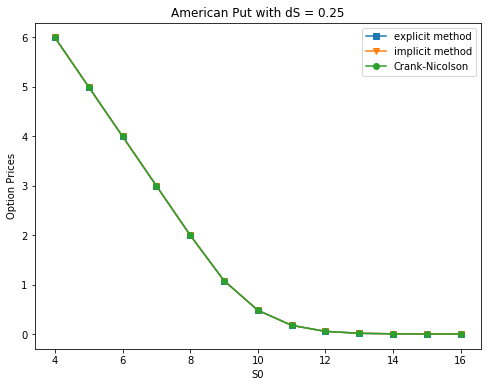

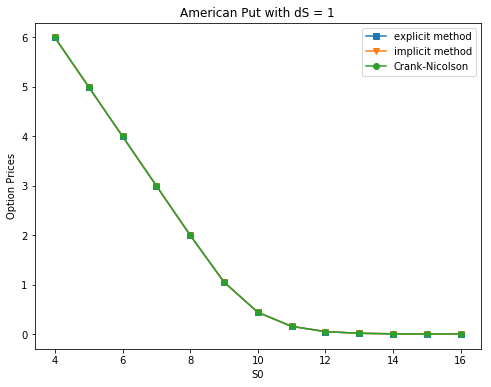

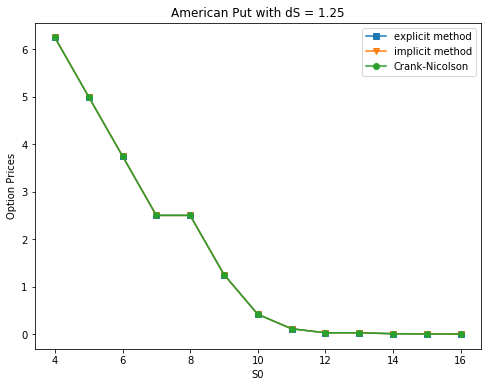

In [29]:
plt.figure(4,figsize = (8,6))
for i in range(3):
    plt.plot(np.arange(4,17,1),optionP[i,:],marker = Shape[i],label = name[i])
plt.legend()
plt.title("American Put with dS = 0.25")
plt.xlabel("S0")
plt.ylabel("Option Prices")

plt.figure(5,figsize = (8,6))
for i in range(3):
    plt.plot(np.arange(4,17,1),optionP[i+3,:],marker = Shape[i],label = name[i])
plt.legend()
plt.title("American Put with dS = 1")
plt.xlabel("S0")
plt.ylabel("Option Prices")

plt.figure(6,figsize = (8,6))
for i in range(3):
    plt.plot(np.arange(4,17,1),optionP[i+6,:],marker = Shape[i],label = name[i])
plt.legend()
plt.title("American Put with dS = 1.25")
plt.xlabel("S0")
plt.ylabel("Option Prices")

**The plots show us that all the three methods are also giving the very similar results since they are all overlaying on each other**